# retrieve CO-OPS data from an arbitrary time interval and region
<div class="alert alert-block alert-warning">
you can install <code>stormevents</code> with
<pre>pip install stormevents</pre>
</div>

In [27]:
import geopandas
from matplotlib import pyplot

countries = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# retrieve a [list of CO-OPS stations](https://stormevents.readthedocs.io/en/latest/coops.html#stormevents.coops.tidalstations.coops_stations)

In [28]:
from stormevents.coops import coops_stations

stations = coops_stations()
stations

,nws_id,name,state,status,removed,geometry
nos_id,,,,,,
1600012,46125,QREB buoy,,active,<NA>,POINT (122.62500 37.75000)
1619910,SNDP5,"Sand Island, Midway Islands",,active,<NA>,POINT (-177.37500 28.21875)
1630000,APRP7,"Apra Harbor, Guam",,active,<NA>,POINT (144.62500 13.44531)
1631428,PGBP7,"Pago Bay, Guam",,active,<NA>,POINT (144.75000 13.42969)
1770000,NSTP6,"Pago Pago, American Samoa",,active,<NA>,POINT (-170.75000 -14.27344)
...,...,...,...,...,...,...
8726667,MCYF1,Mckay Bay Entrance,FL,discontinued,"2020-05-20 00:00:00,2019-03-08 00:00:00,2017-0...",POINT (-82.43750 27.90625)
8772447,FCGT2,Freeport,TX,discontinued,"2020-05-24 18:45:00,2018-10-10 21:50:00,2018-1...",POINT (-95.31250 28.93750)
9087079,GBWW3,Green Bay,WI,discontinued,"2020-10-28 13:00:00,2007-08-06 23:59:00,2007-0...",POINT (-88.00000 44.53125)


Text(0.5, 1.0, 'all CO-OPS stations')

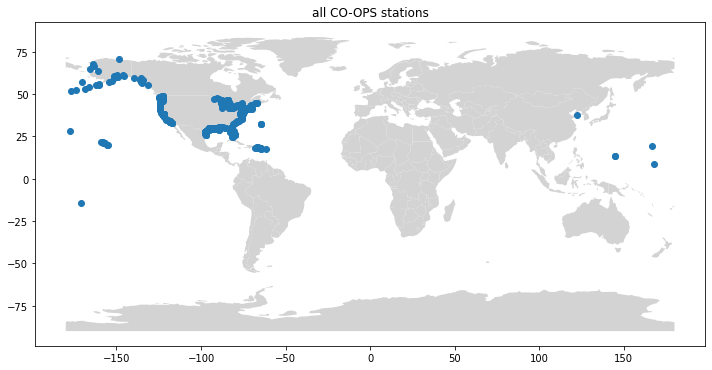

In [29]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

stations.plot(ax=axis)
countries.plot(color='lightgrey', ax=axis, zorder=-1)

axis.set_title(f'all CO-OPS stations')

# retrieve a [list of CO-OPS stations within an arbitrary polygon](https://stormevents.readthedocs.io/en/latest/coops.html#stormevents.coops.tidalstations.coops_stations_within_region)

In [30]:
import shapely
from stormevents.coops import coops_stations_within_region

east_coast = shapely.geometry.box(-85, 25, -65, 45)
east_coast_stations = coops_stations_within_region(region=east_coast)
east_coast_stations

,nws_id,name,state,status,removed,geometry
nos_id,,,,,,
8726412,MTBF1,Middle Tampa Bay,,active,<NA>,POINT (-82.62500 27.65625)
8726679,TSHF1,East Bay Causeway,FL,active,<NA>,POINT (-82.43750 27.92188)
8726694,TPAF1,TPA Cruise Terminal 2,FL,active,<NA>,POINT (-82.43750 27.93750)
9044036,FWNM4,Fort Wayne,MI,active,"2005-04-29 23:59:00,2005-04-29 00:00:00,2001-1...",POINT (-83.06250 42.31250)
9075035,ESVM4,Essexville,MI,active,"2007-03-28 23:59:00,2007-03-28 00:00:00,2007-0...",POINT (-83.87500 43.62500)
...,...,...,...,...,...,...
8720503,GCVF1,"Red Bay Point, St Johns River",FL,discontinued,"2017-10-07 20:54:00,2017-10-07 10:54:00,2017-1...",POINT (-81.62500 29.98438)
8654400,CFPN7,Cape Hatteras Fishing Pier,NC,discontinued,"2018-09-19 23:59:00,2003-09-18 23:59:00,2003-0...",POINT (-75.62500 35.21875)
8720625,RCYF1,"Racy Point, St Johns River",FL,discontinued,"2019-08-05 14:00:00,2017-06-14 15:36:00,2017-0...",POINT (-81.56250 29.79688)


Text(0.5, 1.0, 'CO-OPS stations on the U.S. East Coast')

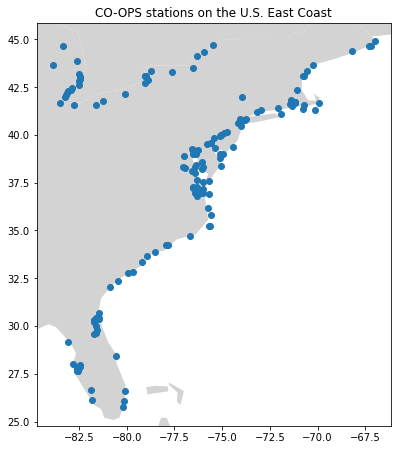

In [31]:
figure, axis = pyplot.subplots(1, 1)
figure.set_size_inches(12, 12 / 1.61803398875)

east_coast_stations.plot(ax=axis)

xlim = axis.get_xlim()
ylim = axis.get_ylim()
countries.plot(color='lightgrey', ax=axis, zorder=-1)
axis.set_xlim(xlim)
axis.set_ylim(ylim)

axis.set_title(f'CO-OPS stations on the U.S. East Coast')

# retrieve a [CO-OPS data product from all stations within an arbitrary polygon](https://stormevents.readthedocs.io/en/latest/coops.html#stormevents.coops.tidalstations.coops_product_within_region)

In [32]:
from datetime import datetime
from stormevents.coops import coops_product_within_region

coops_product_within_region(
    'water_level',
    region=east_coast,
    start_date=datetime(2022, 4, 2, 12),
    end_date=datetime(2022, 4, 2, 12, 30),
)

<xarray.Dataset>
Dimensions:  (t: 6, nos_id: 111)
Coordinates:
  * t        (t) datetime64[ns] 2022-04-02T12:00:00 ... 2022-04-02T12:30:00
  * nos_id   (nos_id) int64 9044036 9075035 9052076 ... 8516945 9052000 8638901
    nws_id   (nos_id) <U5 'FWNM4' 'ESVM4' 'OCTN6' ... 'KPTN6' 'CAVN6' 'CHBV2'
    x        (nos_id) float64 -83.06 -83.88 -78.75 ... -73.75 -76.31 -76.06
    y        (nos_id) float64 42.31 43.62 43.34 42.09 ... 40.81 44.12 37.03
Data variables:
    v        (nos_id, t) float32 175.1 175.1 175.1 175.1 ... 2.084 2.089 2.096
    s        (nos_id, t) float32 0.0 0.0 0.0 0.0 0.0 ... 0.059 0.076 0.088 0.08
    f        (nos_id, t) object '0,0,0,0' '0,0,0,0' ... '1,0,0,0' '1,0,0,0'
    q        (nos_id, t) object 'p' 'p' 'p' 'p' 'p' 'p' ... 'p' 'p' 'p' 'p' 'p'

# retrieve a CO-OPS data product from a [specific station](https://stormevents.readthedocs.io/en/latest/coops.html#stormevents.coops.tidalstations.COOPS_Station)

In [33]:
from stormevents.coops import COOPS_Station

station = COOPS_Station(1612480)
station.product(
    'water_level',
    start_date=datetime(2022, 4, 2, 12),
    end_date=datetime(2022, 4, 2, 12, 30),
)

<xarray.Dataset>
Dimensions:  (nos_id: 1, t: 6)
Coordinates:
  * nos_id   (nos_id) int64 1612480
  * t        (t) datetime64[ns] 2022-04-02T12:00:00 ... 2022-04-02T12:30:00
    nws_id   (nos_id) <U5 'MOKH1'
    x        (nos_id) float64 -157.8
    y        (nos_id) float64 21.44
Data variables:
    v        (nos_id, t) float32 1.406 1.409 1.414 1.417 1.417 1.422
    s        (nos_id, t) float32 0.001 0.002 0.002 0.002 0.001 0.002
    f        (nos_id, t) object '0,0,0,0' '1,0,0,0' ... '0,0,0,0' '0,0,0,0'
    q        (nos_id, t) object 'p' 'p' 'p' 'p' 'p' 'p'

# additional documentation
## https://stormevents.readthedocs.io
## https://github.com/oceanmodeling/StormEvents
